In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [42]:
data = data.drop(['rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'], axis=1)
data

,holiday,temp,date_time,traffic_volume
0,NaN,288.28,2012-10-02 09:00:00,5545
1,NaN,289.36,2012-10-02 10:00:00,4516
2,NaN,289.58,2012-10-02 11:00:00,4767
3,NaN,290.13,2012-10-02 12:00:00,5026
4,NaN,291.14,2012-10-02 13:00:00,4918
...,...,...,...,...
48199,NaN,283.45,2018-09-30 19:00:00,3543
48200,NaN,282.76,2018-09-30 20:00:00,2781
48201,NaN,282.73,2018-09-30 21:00:00,2159
48202,NaN,282.09,2018-09-30 22:00:00,1450


In [43]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [44]:
data['traffic_volume'] = data['traffic_volume'].apply(lambda x: 0.00001 if x == 0 else x)

In [45]:
data['holiday'] = data['holiday'].apply(lambda x: 1 if not pd.isnull(x) else x)

In [46]:
data['holiday'] = data['holiday'].apply(lambda x: 0 if pd.isnull(x) else x)
data

,holiday,temp,date_time,traffic_volume
0,0.0,288.28,2012-10-02 09:00:00,5545.0
1,0.0,289.36,2012-10-02 10:00:00,4516.0
2,0.0,289.58,2012-10-02 11:00:00,4767.0
3,0.0,290.13,2012-10-02 12:00:00,5026.0
4,0.0,291.14,2012-10-02 13:00:00,4918.0
...,...,...,...,...
48199,0.0,283.45,2018-09-30 19:00:00,3543.0
48200,0.0,282.76,2018-09-30 20:00:00,2781.0
48201,0.0,282.73,2018-09-30 21:00:00,2159.0
48202,0.0,282.09,2018-09-30 22:00:00,1450.0


In [47]:
data = data.drop_duplicates(subset=['date_time'])

In [48]:
data.isna().sum()

holiday           0
temp              0
date_time         0
traffic_volume    0
dtype: int64

In [49]:
min_date = data['date_time'].min()
max_date = data['date_time'].max()

In [50]:
df = pd.DataFrame({'date_time': pd.date_range(start = min_date, end = max_date, freq ='1H')})
df

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00
...,...
52546,2018-09-30 19:00:00
52547,2018-09-30 20:00:00
52548,2018-09-30 21:00:00
52549,2018-09-30 22:00:00


In [51]:
df = pd.merge(df, data, left_on='date_time', right_on='date_time', how='left')

In [52]:
df['holiday'] = df['holiday'].apply(lambda x: 0 if pd.isnull(x) else x)

In [53]:
df = df.interpolate()

In [54]:
df.isna().sum()

date_time         0
holiday           0
temp              0
traffic_volume    0
dtype: int64

In [55]:
import datetime

In [56]:
df = df.drop(df[df.date_time < datetime.datetime(year=2016, month=1, day=1)].index)

In [57]:
from statsmodels.tsa.stattools import adfuller 

In [58]:
df.describe()

,date_time,holiday,temp,traffic_volume
count,24096,24096.000000,24096.000000,24096.000000
mean,2017-05-16 23:30:00,0.001162,282.123048,3312.725909
min,2016-01-01 00:00:00,0.000000,243.390000,0.000010
25%,2016-09-07 23:45:00,0.000000,272.790000,1310.750000
50%,2017-05-16 23:30:00,0.000000,283.970000,3509.000000
75%,2018-01-22 23:15:00,0.000000,292.510000,4936.250000
max,2018-09-30 23:00:00,1.000000,310.070000,7280.000000
std,NaN,0.034069,12.652722,1963.519372


In [59]:
df_check = df[['traffic_volume']]
df_check

,traffic_volume
28455,1513.0
28456,1550.0
28457,1134.5
28458,719.0
28459,533.0
...,...
52546,3543.0
52547,2781.0
52548,2159.0
52549,1450.0


In [60]:
df_check.isna().sum()

traffic_volume    0
dtype: int64

In [63]:
df_check

,traffic_volume
28455,1513.0
28456,1550.0
28457,1134.5
28458,719.0
28459,533.0
...,...
52546,3543.0
52547,2781.0
52548,2159.0
52549,1450.0


In [61]:
res = adfuller(df_check) 

In [62]:
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: -21.809192
p-value: 0.000000


p-value < 0.05 - ряд стационарный

In [64]:
df

,date_time,holiday,temp,traffic_volume
28455,2016-01-01 00:00:00,1.0,265.940,1513.0
28456,2016-01-01 01:00:00,0.0,266.000,1550.0
28457,2016-01-01 02:00:00,0.0,266.005,1134.5
28458,2016-01-01 03:00:00,0.0,266.010,719.0
28459,2016-01-01 04:00:00,0.0,264.800,533.0
...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.450,3543.0
52547,2018-09-30 20:00:00,0.0,282.760,2781.0
52548,2018-09-30 21:00:00,0.0,282.730,2159.0
52549,2018-09-30 22:00:00,0.0,282.090,1450.0


In [65]:
df.dtypes

date_time         datetime64[ns]
holiday                  float64
temp                     float64
traffic_volume           float64
dtype: object

In [66]:
from datetime import datetime, timedelta

In [67]:
df_test = df.loc[df['date_time'] > max_date.to_pydatetime() - timedelta(days=14)]
df_test

,date_time,holiday,temp,traffic_volume
52215,2018-09-17 00:00:00,0.0,296.58,550.0
52216,2018-09-17 01:00:00,0.0,296.19,280.0
52217,2018-09-17 02:00:00,0.0,295.82,260.0
52218,2018-09-17 03:00:00,0.0,295.83,344.0
52219,2018-09-17 04:00:00,0.0,295.68,880.0
...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.45,3543.0
52547,2018-09-30 20:00:00,0.0,282.76,2781.0
52548,2018-09-30 21:00:00,0.0,282.73,2159.0
52549,2018-09-30 22:00:00,0.0,282.09,1450.0


In [68]:
df_train = df.loc[df['date_time'] <= max_date.to_pydatetime() - timedelta(days=14)]
df_train

,date_time,holiday,temp,traffic_volume
28455,2016-01-01 00:00:00,1.0,265.940,1513.0
28456,2016-01-01 01:00:00,0.0,266.000,1550.0
28457,2016-01-01 02:00:00,0.0,266.005,1134.5
28458,2016-01-01 03:00:00,0.0,266.010,719.0
28459,2016-01-01 04:00:00,0.0,264.800,533.0
...,...,...,...,...
52210,2018-09-16 19:00:00,0.0,303.020,3400.0
52211,2018-09-16 20:00:00,0.0,300.780,3092.0
52212,2018-09-16 21:00:00,0.0,298.900,2623.0
52213,2018-09-16 22:00:00,0.0,297.850,1725.0


In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [84]:
test = df.iloc[-100:]
test

,date_time,holiday,temp,traffic_volume
52451,2018-09-26 20:00:00,0.0,285.82,3197.0
52452,2018-09-26 21:00:00,0.0,284.41,3475.0
52453,2018-09-26 22:00:00,0.0,284.51,1973.0
52454,2018-09-26 23:00:00,0.0,284.86,1209.0
52455,2018-09-27 00:00:00,0.0,285.26,654.0
...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.45,3543.0
52547,2018-09-30 20:00:00,0.0,282.76,2781.0
52548,2018-09-30 21:00:00,0.0,282.73,2159.0
52549,2018-09-30 22:00:00,0.0,282.09,1450.0


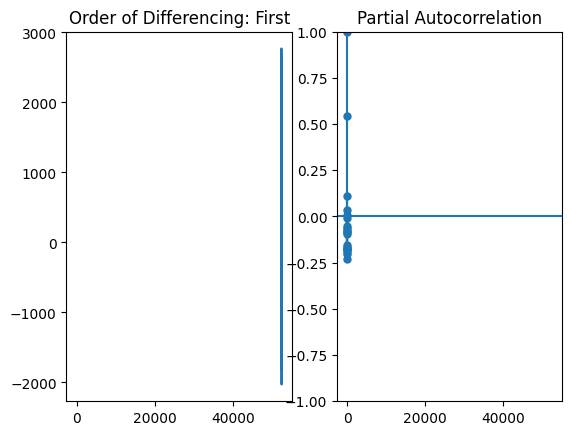

In [88]:
fig, axes = plt.subplots(1, 2, sharex = True) 
axes[0].plot(test.traffic_volume.diff())
axes[0].set_title('Order of Differencing: First') 
plot_pacf(test.traffic_volume.diff().dropna(), ax = axes[1]) 
 
plt.show() 

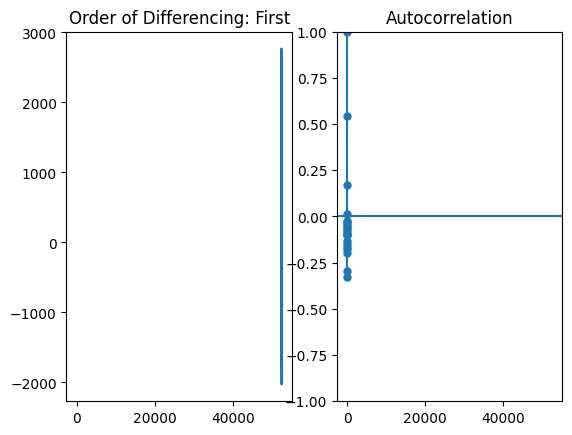

In [89]:
fig, axes = plt.subplots(1, 2, sharex = True) 
axes[0].plot(test.traffic_volume.diff())
axes[0].set_title('Order of Differencing: First') 
plot_acf(test.traffic_volume.diff().dropna(), ax = axes[1]) 
 
plt.show()

In [93]:
from statsmodels.tsa.arima.model import ARIMA

In [97]:
model = ARIMA(df.traffic_volume, order = (1, 0, 1), seasonal_order=(1, 0, 1, 24*7)) #(p,d,q) (P,D,Q,s)
result = model.fit() 
print(result.summary()) 

MemoryError: Unable to allocate 5.19 GiB for an array with shape (170, 170, 24096) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1000, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 5.19 GiB for an array with shape (170, 170, 24096) and data type float64


AttributeError: Memoryview is not initialized